In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Chapter 2, Question 7
A1 = {'X1':0.0,'X2':3.0,'X3':0.0,'Y':"Red"}
A2 = {'X1':2.0,'X2':0.0,'X3':0.0,'Y':"Red"}
A3 = {'X1':0.0,'X2':1.0,'X3':3.0,'Y':"Red"}
A4 = {'X1':0.0,'X2':1.0,'X3':2.0,'Y':'Green'}
A5 = {'X1':-1.0,'X2':0.0,'X3':1.0,'Y':'Green'}
A6 = {'X1':1.0,'X2':1.0,'X3':1.0,'Y':"Red"}

df = pd.DataFrame({1:A1,2:A2,3:A3,4:A4,5:A5,6:A6}).T
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [5]:
# Euclidian distance
df['distance'] = (df.X1**2 + df.X2**2 + df.X3**2)**0.5
df['distance'] = pd.to_numeric(df['distance'])

In [6]:
# a) for K=1
df.loc[df.loc[:,'distance'].idxmin(),'Y']

'Green'

Using K=1 and the Euclidian distance, the predicted outcome is "Green".

In [7]:
# b) for K=3
df.sort_values('distance').head(3)['Y'].value_counts()

Red      2
Green    1
Name: Y, dtype: int64

Using K=3 and the Euclidian distance, the predicted outcom is "Red".

In [8]:
# Chapter 2, Question 8 a)

# Import data and inspect dataframe
df = pd.read_csv('./datasets/College.csv')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
# b)
# Change index to university name
df.set_index(df.columns[0],inplace=True)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
# c) Summarize data
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


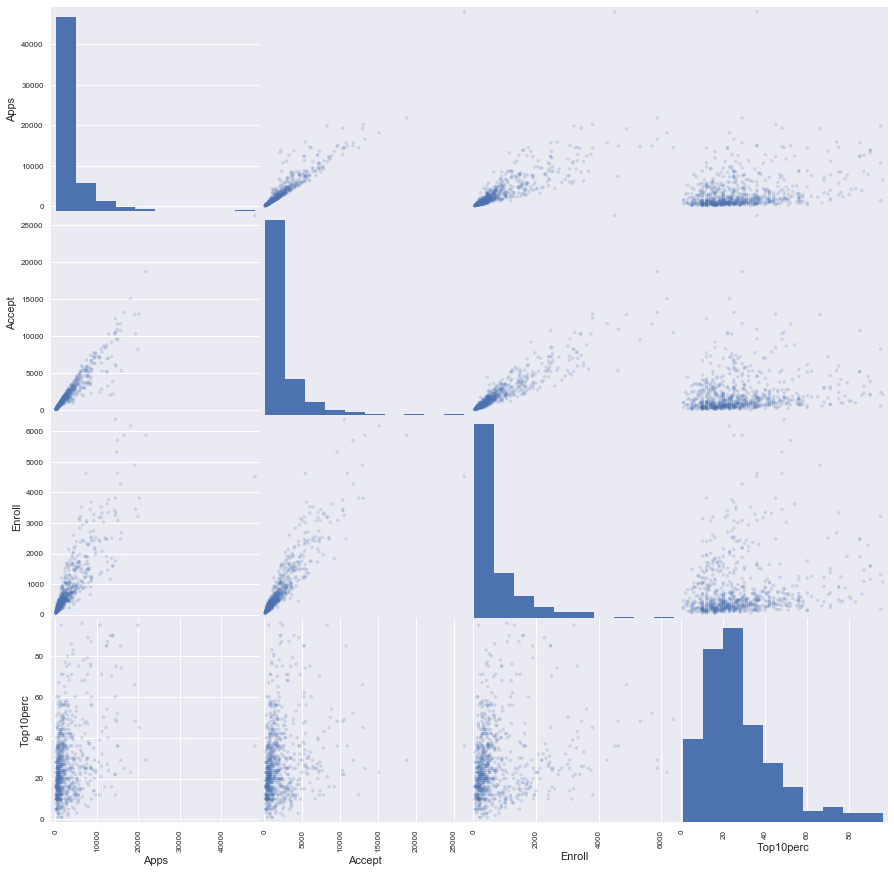

In [11]:
# Plot feature relationships
axes = pd.plotting.scatter_matrix(df[df.columns[0:5]], alpha=0.2, figsize=(15,15))

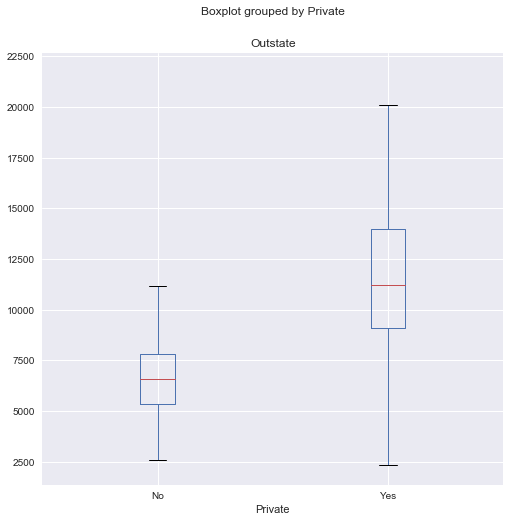

In [12]:
# Plot outsate as function of Private
df.boxplot(column='Outstate',by='Private',figsize=(8,8))

In [13]:
# binning Top10perc
df['Elite'] = False
df.loc[df['Top10perc']>=50,'Elite']=True

In [14]:
# Inspect new feature
df['Top10perc'].describe()

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64

In [15]:
# Question 9
df = pd.read_csv('./datasets/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
# Inspect the type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [17]:
# Inspect the range of the quantitative features
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
# Remove the 10th though 85th observations and compute new ranges
df_2 = pd.concat([df.iloc[1:10],df.iloc[86:]],axis=0)
df_2.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,24.465000,5.362500,186.800000,2931.400000,15.720625,77.165625,1.600000
std,7.904042,1.649499,99.795012,810.274671,2.702689,3.107389,0.816752
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,99.500000,2213.750000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,144.500000,2792.500000,15.550000,77.000000,1.000000
75%,30.750000,6.000000,250.000000,3478.750000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


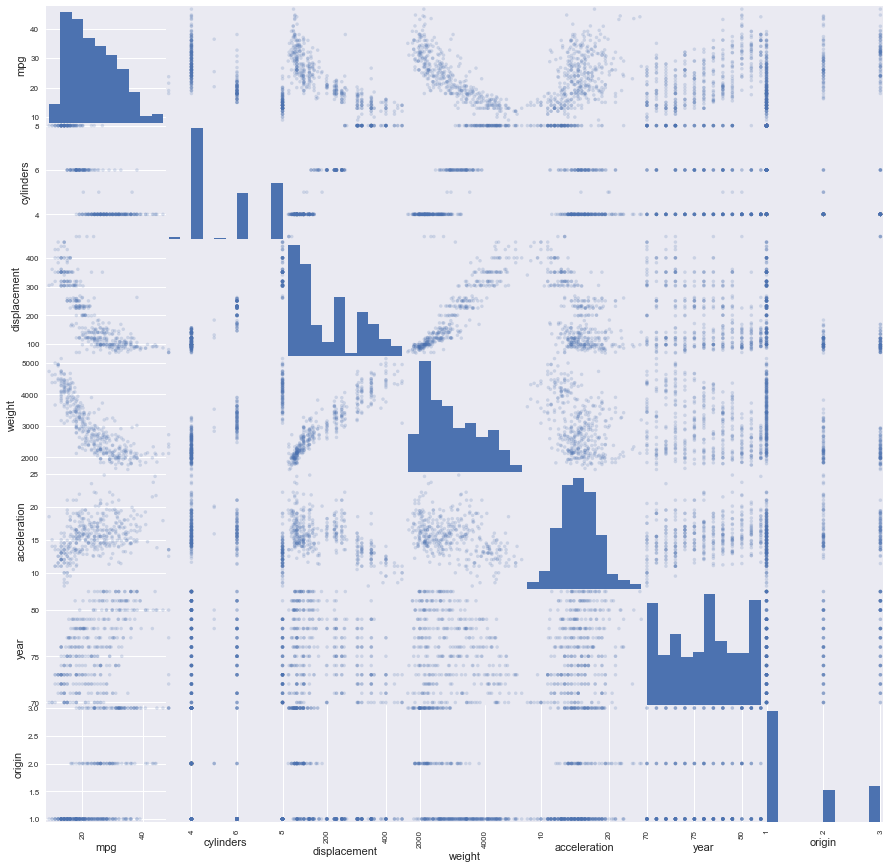

In [19]:
# Plot feature relationships
axes = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,15))

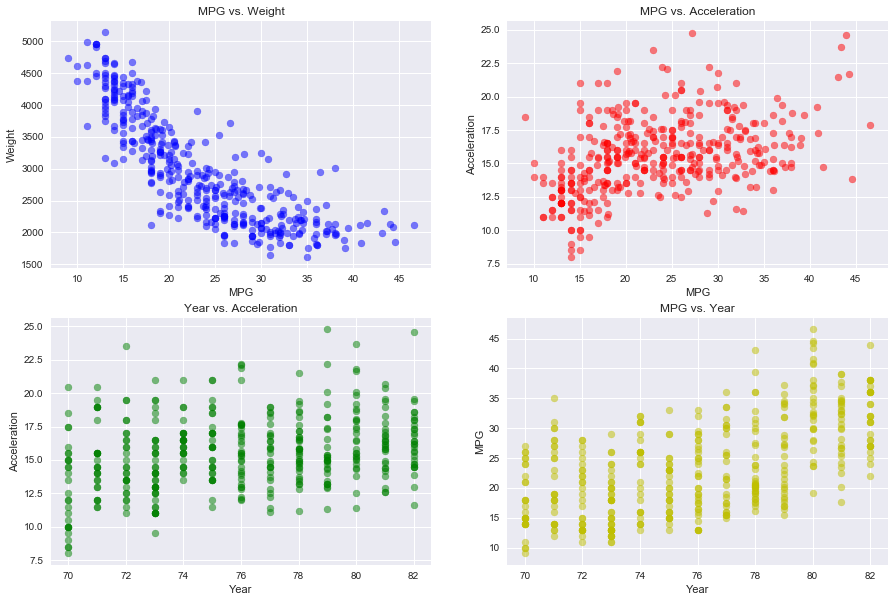

In [20]:
# Data inspection
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x=df['mpg'],y=df['weight'],alpha=0.5,c='blue')
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.title('MPG vs. Weight')

plt.subplot(2, 2, 2)
plt.scatter(x=df['mpg'],y=df['acceleration'],alpha=0.5,c='r')
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.title('MPG vs. Acceleration')

plt.subplot(2, 2, 3)
plt.scatter(x=df['year'],y=df['acceleration'],alpha=0.5,c='g')
plt.xlabel('Year')
plt.ylabel('Acceleration')
plt.title('Year vs. Acceleration')

plt.subplot(2, 2, 4)
plt.scatter(x=df['year'],y=df['mpg'],alpha=0.5,c='y')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.title('MPG vs. Year')
plt.show()

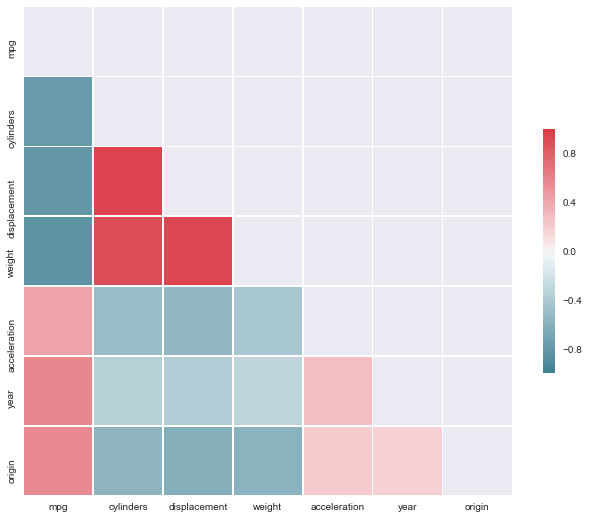

In [21]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
# Question 10

# Import data and inspect dataframe
df = pd.read_csv('./datasets/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
# Question 10a)
# Inspect shape and content
print(df.shape)

(506, 14)


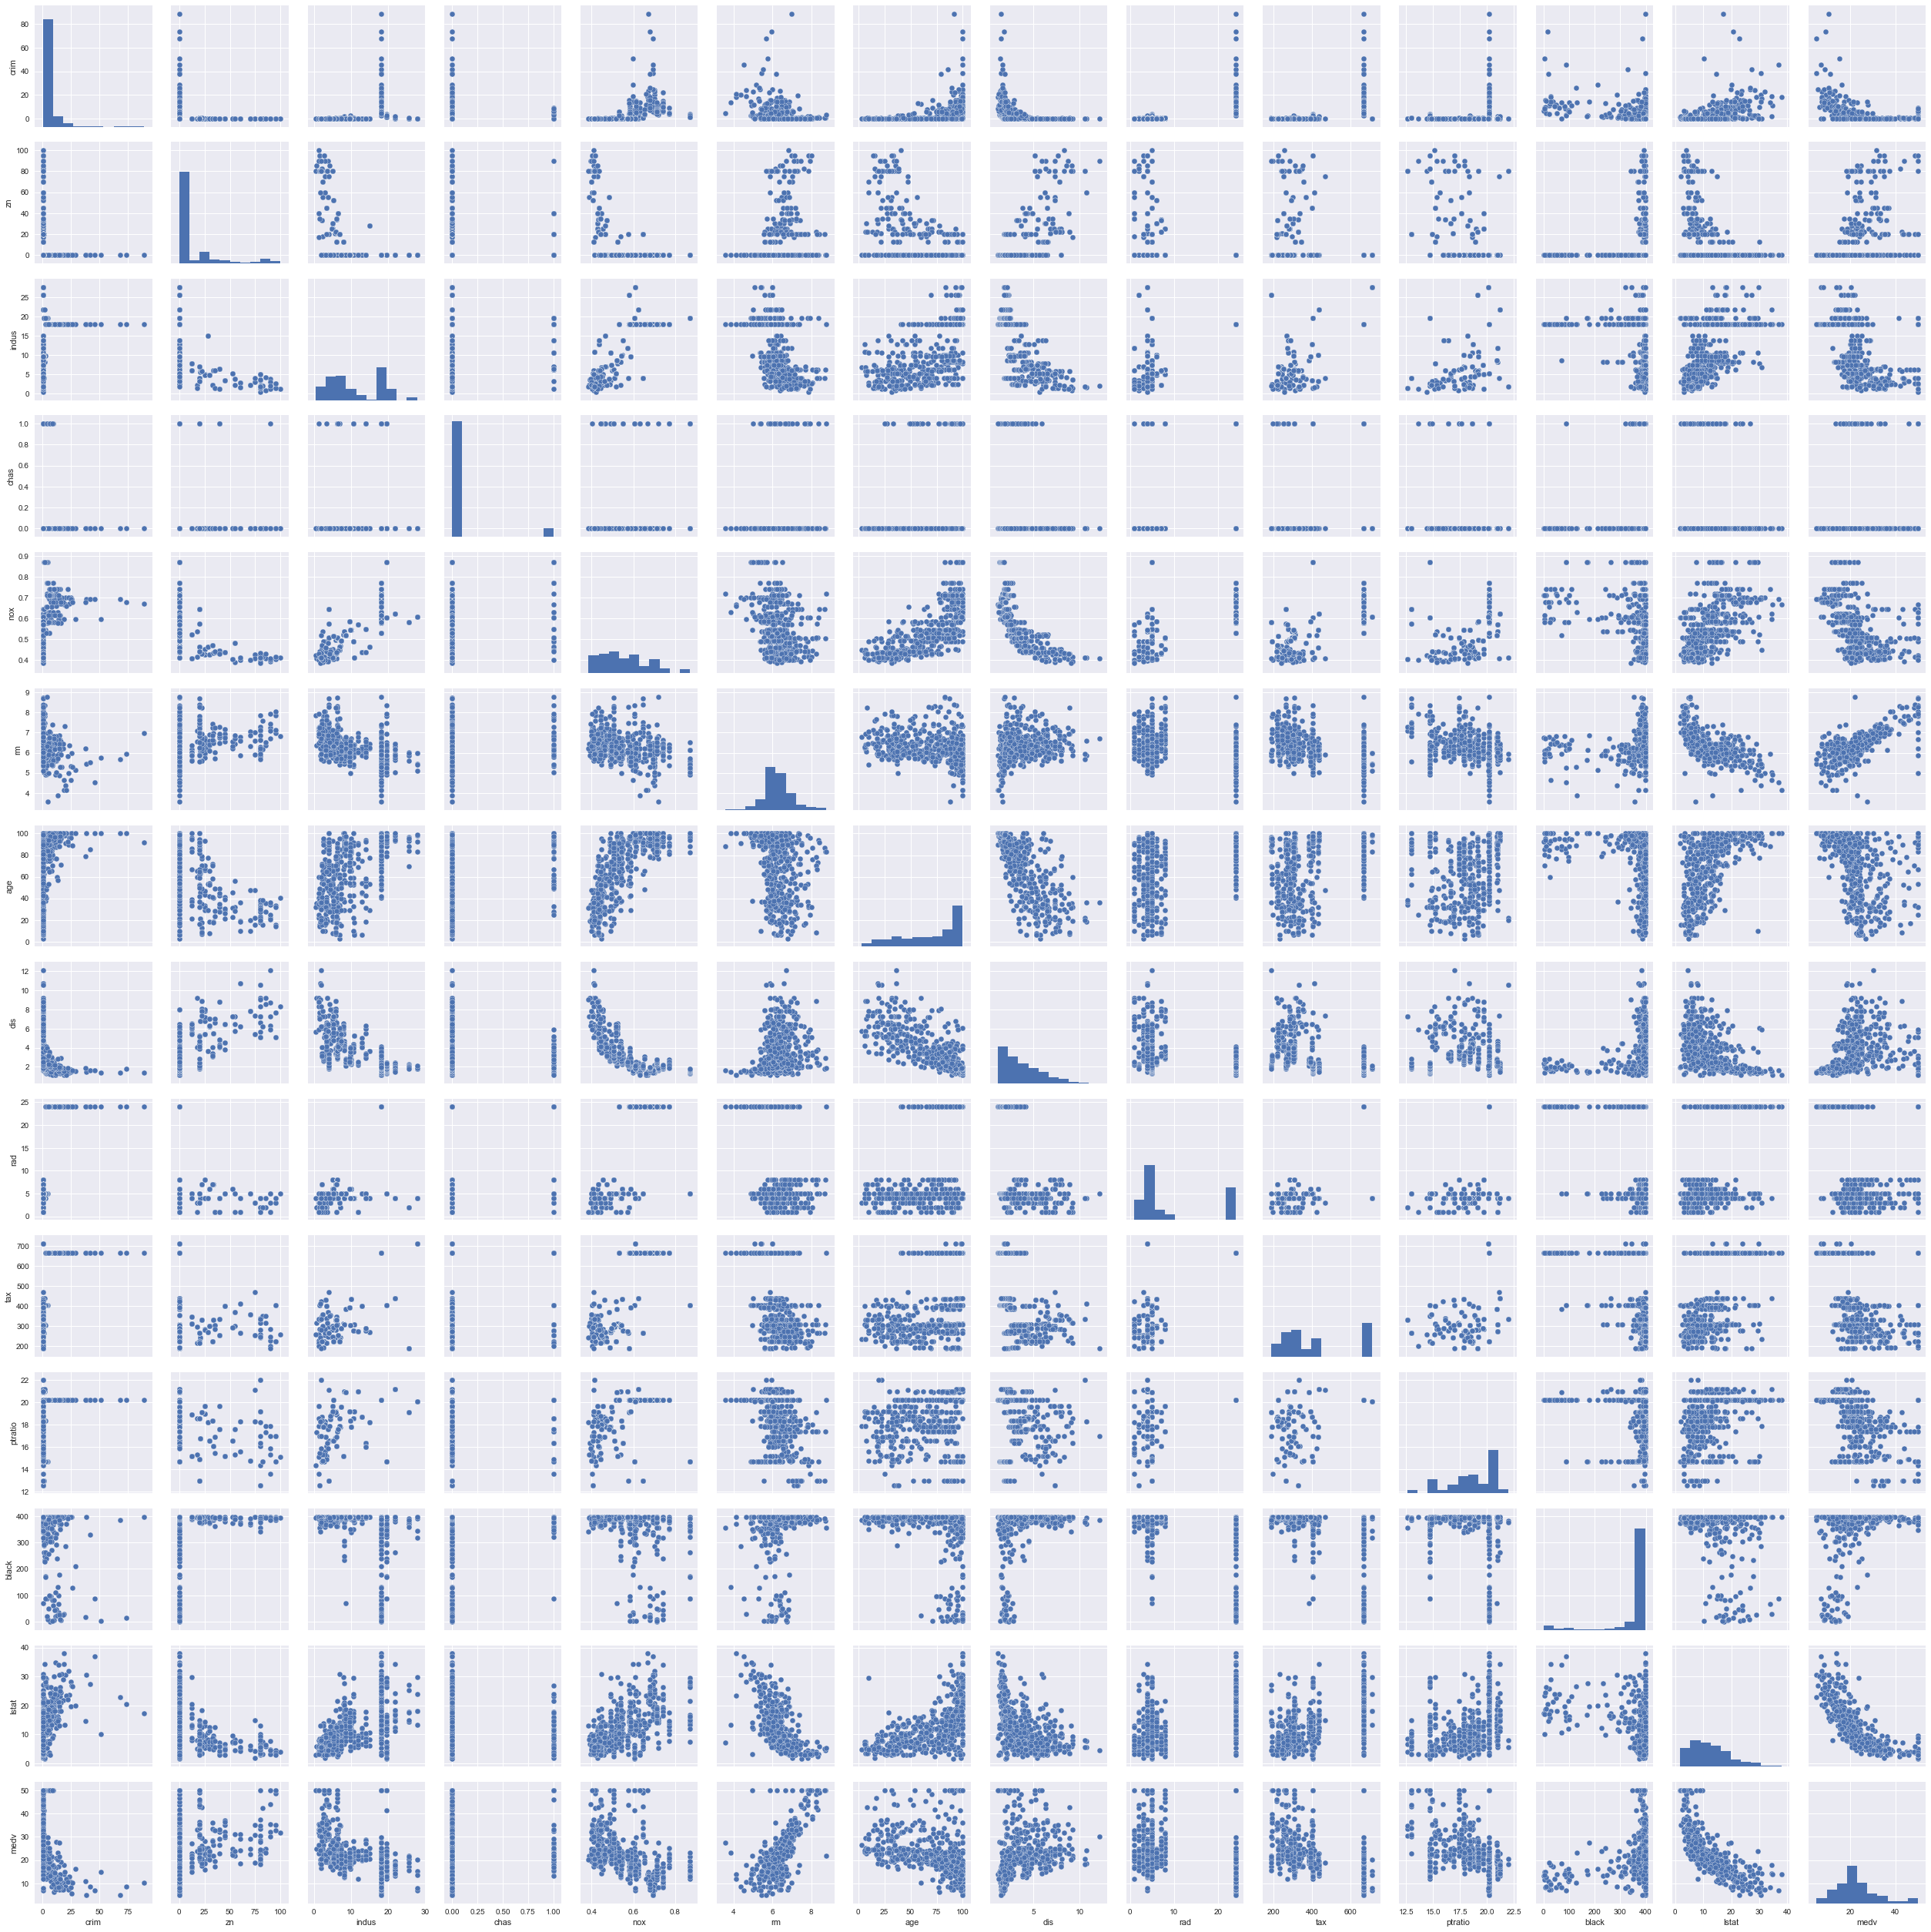

In [24]:
# Plot feature relationships
sns.pairplot(df)

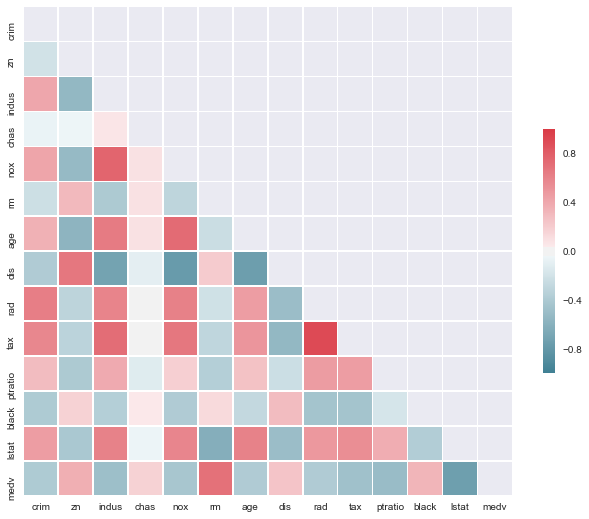

In [25]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
corr['crim'].sort_values()

medv      -0.388305
black     -0.385064
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
crim       1.000000
Name: crim, dtype: float64

In [36]:
# High crime rate
df['crim'].sort_values(ascending=False).head()

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
Name: crim, dtype: float64